# ECG Hearbeat Categorization

En este modelo utilizaremos dos datasets famosos para la clasificacion de los latidos del corazón:
* MIT-BIH Arrythmia Dataset
* The PTB Diagnostic ECG

Los datasets contienen señales que corresponden a las formas de los latidos del corazon obtenidos por un electrocardiograma (ECG).

Estas señales estan preprocesadas y segmentadas de manera que cada segmento corresponde a un latido.

**MIT-BIH Arrythmia Dataset**

    Number of Samples: 109446
    Number of Categories: 5
    Sampling Frequency: 125Hz
    Data Source: Physionet's MIT-BIH Arrhythmia Dataset
    Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

**The PTB Diagnostic ECG Database**

    Number of Samples: 14552
    Number of Categories: 2
    Sampling Frequency: 125Hz
    Data Source: Physionet's PTB Diagnostic Database

### Data Files

This dataset consists of a series of CSV files. Each of these CSV files contain a matrix, with each row representing an example in that portion of the dataset. The final element of each row denotes the class to which that example belongs.

**Load Data**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight, resample

In [2]:
train_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
test_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)

In [3]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
clases = train_df[187].value_counts()
print(clases)

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


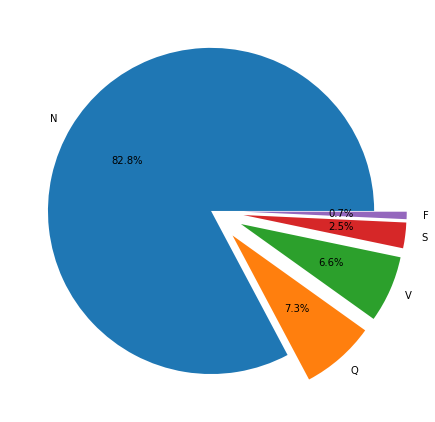

In [5]:
plt.figure(figsize=(7.5,7.5))
explode = (0, 0.2, 0.2, 0.2, 0.2)
plt.pie(clases, labels=['N','Q','V','S','F'], autopct='%1.1f%%', explode=explode)
plt.show()

In [6]:
df_0 = train_df[train_df[187]==0.0].sample(n=16000, random_state=1)
df_1 = train_df[train_df[187]==1.0]
df_2 = train_df[train_df[187]==2.0]
df_3 = train_df[train_df[187]==3.0]
df_4 = train_df[train_df[187]==4.0]
# upsample
df_1_up=resample(df_1, replace=True, n_samples=16000, random_state=1)
df_2_up=resample(df_2, replace=True, n_samples=16000, random_state=1)
df_3_up=resample(df_3, replace=True, n_samples=16000, random_state=1)
df_4_up=resample(df_4, replace=True, n_samples=16000, random_state=1)

train_df = pd.concat([df_0, df_1_up, df_2_up, df_3_up, df_4_up])

In [7]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
65728,1.000000,0.918864,0.567951,0.243408,0.279919,0.310345,0.283976,0.283976,0.277890,0.267748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33224,0.199288,0.074733,0.270463,0.427046,0.551601,0.569395,0.558719,0.565836,0.594306,0.597865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46733,1.000000,0.929448,0.328221,0.070552,0.205521,0.294479,0.309816,0.319018,0.322086,0.346626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49665,0.000000,0.059006,0.236025,0.347826,0.434783,0.431677,0.422360,0.437888,0.456522,0.453416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30911,0.975659,0.872211,0.531440,0.255578,0.184584,0.162272,0.109533,0.113590,0.113590,0.107505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85165,1.000000,0.567164,0.570895,0.585821,0.585821,0.563433,0.574627,0.522388,0.402985,0.298507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
86756,0.664697,0.589365,0.483013,0.392910,0.273264,0.162482,0.087149,0.031019,0.000000,0.026588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83845,0.945148,0.518987,0.556962,0.556962,0.544304,0.510549,0.527426,0.459916,0.337553,0.206751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83949,1.000000,0.505618,0.535581,0.520599,0.528090,0.524345,0.531835,0.479401,0.404494,0.303371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
clases = train_df[187].value_counts()
print(clases)

0.0    16000
4.0    16000
3.0    16000
1.0    16000
2.0    16000
Name: 187, dtype: int64


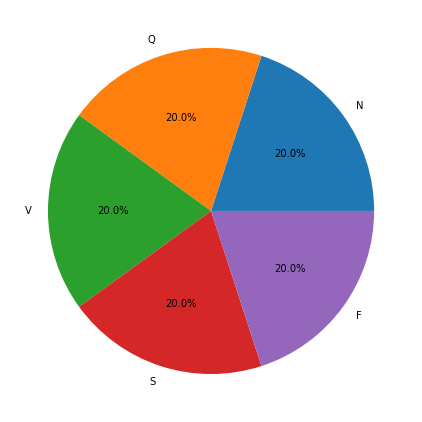

In [9]:
plt.figure(figsize=(7.5,7.5))
plt.pie(clases, labels=['N','Q','V','S','F'], autopct='%1.1f%%')
plt.show()

Analizaremos algunas muestras de las clases

**N:0**

Text(0.5, 1.0, 'Unknown beats')

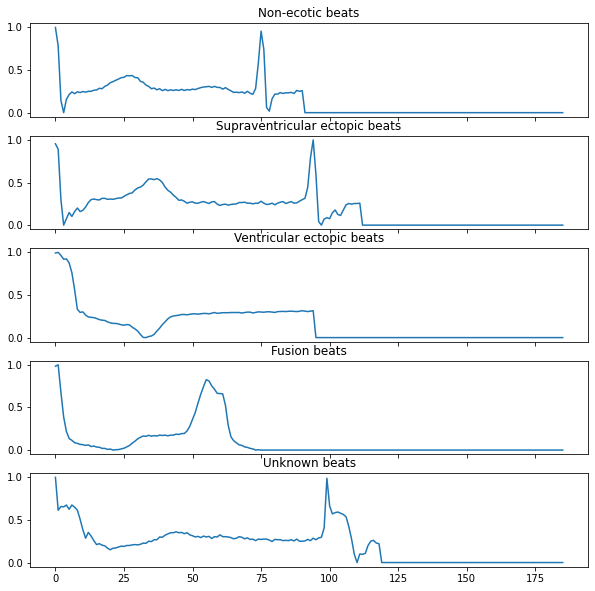

In [10]:
sample_n=df_0.sample(1)
sample_s=df_1.sample(1)
sample_v=df_2.sample(1)
sample_f=df_3.sample(1)
sample_q=df_4.sample(1)

fig, ax = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(10,10)
ax[0].plot(sample_n.iloc[0,:186])
ax[0].set_title("Non-ecotic beats")
ax[1].plot(sample_s.iloc[0,:186])
ax[1].set_title("Supraventricular ectopic beats")
ax[2].plot(sample_v.iloc[0,:186])
ax[2].set_title("Ventricular ectopic beats")
ax[3].plot(sample_f.iloc[0,:186])
ax[3].set_title("Fusion beats")
ax[4].plot(sample_q.iloc[0,:186])
ax[4].set_title("Unknown beats")

#plt.show()

### Preprocesamiento de datos

In [11]:
y_train = to_categorical(train_df[187])
y_test = to_categorical(test_df[187])

x_train = train_df.iloc[:,:186].values
x_test = test_df.iloc[:,:186].values
x_train = x_train.reshape(len(x_train), x_train.shape[1],1)
x_test = x_test.reshape(len(x_test), x_test.shape[1],1)

### Red convolucional

In [12]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
cnn = Sequential()
cnn.add(Conv1D(128,3,input_shape=(x_train.shape[1],1), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,2, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(64,2, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(5, activation='softmax'))

### Parametros de entrenamiento

In [14]:
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', patience=8), ModelCheckpoint(filepath='./best_weights.h5', monitor='val_loss', save_best_only=True)]
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 184, 128)          512       
_________________________________________________________________
batch_normalization (BatchNo (None, 184, 128)          512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 92, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 90, 64)            24640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 45, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 44, 64)            8

In [ ]:
cnn.fit(x_train, y_train,steps_per_epoch=10000, epochs=100, callbacks=callbacks, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/100
  425/10000 [>.............................] - ETA: 5:07 - loss: 0.7872 - accuracy: 0.7083

### Prueba del modelo

In [ ]:
scores = cnn.evaluate(x_test,y_test, verbose=1)
y_predict = cnn.predict(x_test)

In [ ]:
# Funcion desarrollada por Coni57
# https://www.kaggle.com/coni57
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))
plt.imshow(cf_matrix)

In [ ]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,title='Confusion matrix, with normalization')
plt.show()

### Guardar el modelo

In [ ]:
cnn.save('./ecg_model2.h5')
cnn.save_weights('./ecg_weights2.h5')

# CNN ECG Classification with noise

In [ ]:
gauss_std=0.5
gauss_k=0.1

# Ruido gaussiano en el entrenamiento
x_noise_train = train_df.iloc[:,:186].values.copy()
for i in range(len(x_noise_train)):
    x_noise_train[i,:186]=x_noise_train[i,:186]+gauss_k*np.random.normal(0,gauss_std,186)
x_noise_train_graph=x_noise_train
x_noise_train = x_noise_train.reshape(len(x_noise_train),x_noise_train.shape[1],1)

# Ruido gaussiano en las pruebas
x_noise_test = test_df.iloc[:,:186].values.copy()
for i in range(len(x_noise_test)):
    x_noise_test[i,:186]=x_noise_test[i,:186]+gauss_k*np.random.normal(0,gauss_std,186)
x_noise_test_graph=x_noise_test
x_noise_test = x_noise_test.reshape(len(x_noise_test),x_noise_test.shape[1],1)

In [ ]:
scores_noise = cnn.evaluate(x_noise_train,y_train, verbose=1)
y_noise_predict = cnn.predict(x_noise_train)

In [ ]:
cf_matrix_noise = confusion_matrix(y_train.argmax(axis=1),y_noise_predict.argmax(axis=1))
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cf_matrix_noise, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,title='Confusion matrix, with normalization')
plt.show()

In [ ]:
plt.plot(train_df.iloc[0,:186])
plt.show()

In [ ]:
plt.plot(x_noise_train_graph[0])
plt.show()

### Transfer Learning

In [ ]:
from keras.models import load_model
cnn_transfer = load_model('./ecg_model2.h5')
cnn_transfer.load_weights('./ecg_weights2.h5')
cnn_transfer.summary()

In [ ]:
cnn_transfer.trainable = False
cnn_transfer.pop()
cnn_transfer.summary()

In [ ]:
cnn2 = Sequential()
cnn2.add(cnn_transfer)
cnn2.add(Dense(64, activation='relu'))
cnn2.add(Dropout(0.25))
cnn2.add(Dense(5, activation='softmax'))
cnn2.summary()

In [ ]:
cnn2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks2 = [EarlyStopping(monitor='val_loss', patience=8), ModelCheckpoint(filepath='./best_noise_weights.h5', monitor='val_loss', save_best_only=True)]

In [ ]:
cnn2.fit(x_noise_train, y_train,steps_per_epoch=10000, epochs=100, callbacks=callbacks2, batch_size=32, validation_data=(x_noise_test,y_test))

In [ ]:
cnn2.load_weights('./best_noise_weights.h5')

### Fine Tuning

In [ ]:
from keras.optimizers import Adam
callbacks3 = [EarlyStopping(monitor='val_loss', patience=8), ModelCheckpoint(filepath='./best_noise_weights2.h5', monitor='val_loss', save_best_only=True)]
cnn_transfer.trainable = True
cnn2.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])
cnn2.fit(x_noise_train, y_train,steps_per_epoch=10000, epochs=10, callbacks=callbacks3, batch_size=32, validation_data=(x_noise_test,y_test))

### Matriz de confusion para señales con ruido

In [ ]:
y_noise_predict2 = cnn2.predict(x_noise_test)
cf_matrix_noise2 = confusion_matrix(y_test.argmax(axis=1),y_noise_predict2.argmax(axis=1))
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cf_matrix_noise2, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,title='Confusion matrix, with normalization')
plt.show()

### Matriz de confusion para señales preprocesadas

In [ ]:
y_predict2 = cnn2.predict(x_test)
cf_matrix2 = confusion_matrix(y_test.argmax(axis=1),y_predict2.argmax(axis=1))
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cf_matrix2, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,title='Confusion matrix, with normalization')
plt.show()

### Probar el modelo

In [ ]:
prediccion = cnn.predict(np.array([x_noise_train[1]]))

In [ ]:
prediccion